In [4]:
# Importação das bibliotecas
import cv2
import matplotlib.pyplot as plt
import easyocr

In [5]:
# Carregamento da imagem
#image_path = 'FFVI\\Dialog\\options.jpg'
image_path = 'FFVI\\Dialog\\textbox_with_img.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Template matching para localizar a seta
template_path = 'FFVI\\Dialog\\pointer.jpg'
template = cv2.imread(template_path, 0)

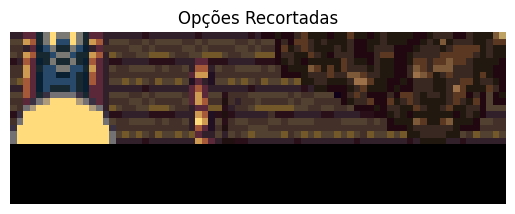

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [6]:
res = cv2.matchTemplate(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# Salvar as coordenadas da seta
top_left = max_loc
h, w = template.shape   
bottom_right = (top_left[0] + w, top_left[1] + h)

# Definir a área de recorte com base nas coordenadas da seta
offset_x = 0  # Ajustar conforme necessário
offset_y = 0  # Ajustar conforme necessário
width = 150    # Ajustar conforme necessário
height = 90   # Ajustar conforme necessário

crop_top_left = (top_left[0] + offset_x, top_left[1] + offset_y)
crop_bottom_right = (crop_top_left[0] + width, crop_top_left[1] + height)

# Recortar a área das opções
cropped_options = image[crop_top_left[1]:crop_bottom_right[1], crop_top_left[0]:crop_bottom_right[0]]

# Exibir a imagem recortada
plt.imshow(cv2.cvtColor(cropped_options, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Opções Recortadas')
plt.show()

# Aplicar OCR na imagem recortada das opções
reader = easyocr.Reader(['pt'])
result = reader.readtext(cropped_options)

# Imprimir os resultados
for (bbox, text, prob) in result:
    print(f'Texto: {text}, Confiança: {prob}')


In [7]:
def options_cutscene(image_path, offset_x=0, offset_y=0, width=150, height=90):
    # Load the images
    image = cv2.imread(image_path)
    template_path = 'FFVI\\Dialog\\pointer.jpg'
    template = cv2.imread(template_path, 0)
    
    # Template matching to find the arrow
    res = cv2.matchTemplate(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Coordinates of the matched area
    top_left = max_loc
    h, w = template.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # Define the cropping area based on the arrow coordinates
    crop_top_left = (top_left[0] + offset_x, top_left[1] + offset_y)
    crop_bottom_right = (crop_top_left[0] + width, crop_top_left[1] + height)
    
    # Crop the options area
    cropped_options = image[crop_top_left[1]:crop_bottom_right[1], crop_top_left[0]:crop_bottom_right[0]]
    
    # Apply OCR on the cropped image
    reader = easyocr.Reader(['pt'])
    result = reader.readtext(cropped_options)
    
    # Extract the text from the result
    extracted_text = [text for (bbox, text, prob) in result]
    
    return extracted_text


In [10]:
image_path = 'FFVI\\Dialog\\textbox_with_img.png'
text_list = extract_text_from_image(image_path)
print(text_list)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[]
